In [20]:
import os
import random as rn
from copy import copy

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from model_utils import *
from preprocess import preprocess

In [2]:
random_seed = 12345
np.random.seed(random_seed)
set_seed_global(random_seed)

In [3]:
filename = "htt_features_test.pkl"
data_dict = preprocess(filename, enable_dicriminators=False, random_seed=random_seed)

In [71]:
y_true = data_dict["labels"][:]
X = data_dict["features"][:]

In [72]:
# false_rate = 0.9
# false_rates = 1 - np.exp(-np.arange(0, 10, 1))
# print(false_rates)
false_rates = [1.0, 0.999, 0.99, 0.98, 0.97, 0.96, 0.95, 0.92, 0.90, 0.8, 
               0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
auc_true = []
auc_test_true = []
auc_new = []
auc_test_new = []
rates = []
for false_rate in false_rates:
    np.random.seed(random_seed)
    y_new = copy(y_true)
    np.random.shuffle(y_new[:int(false_rate * y_new.shape[0])])
    print(false_rate)
    print(y_true[y_new == 1].mean())
    print(y_true[y_new == 0].mean())
    rates.append(y_true[y_new == 1].mean())
    model = train_xgb(X, y_new, "test_xgb_" + str(false_rate), random_seed=random_seed)
    _, X_test, _, y_test_new = train_test_split(X, y_new, random_state=random_seed)
    _, X_test, _, y_test_true = train_test_split(X, y_true, random_state=random_seed)
    pred_test = model.predict_proba(X_test)[:, 1]
    auc_test_true.append(roc_auc_score(y_test_true, pred_test))
    auc_test_new.append(roc_auc_score(y_test_new, pred_test))
    y_pred = model.predict_proba(X)[:, 1]
    print_results(y_true, y_pred, "test_xgb_" + str(false_rate), is_test=False)
    auc_true.append(roc_auc_score(y_true, y_pred))    
    auc_new.append(roc_auc_score(y_new, y_pred))

1.0
0.10212705615428247
0.10208299745268114
test_xgb_1.0 test accuracy 0.8986427016259786
test_xgb_1.0 test ROC AUC 0.49965374685840586
test_xgb_1.0 whole accuracy 0.8979125047048264
test_xgb_1.0 whole ROC AUC 0.42356405166230493
0.999
0.100850822461713
0.10222809789443137
test_xgb_0.999 test accuracy 0.8983184323898643
test_xgb_0.999 test ROC AUC 0.500595723901832
test_xgb_0.999 whole accuracy 0.8979096094270245
test_xgb_0.999 whole ROC AUC 0.42122547729833315
0.99
0.1133862733976177
0.10080288911101797
test_xgb_0.99 test accuracy 0.898376337610599
test_xgb_0.99 test ROC AUC 0.5059718651924703
test_xgb_0.99 whole accuracy 0.8979096094270245
test_xgb_0.99 whole ROC AUC 0.8929996175281479
0.98
0.1207033465683494
0.09997097991164995
test_xgb_0.98 test accuracy 0.8991985917450317
test_xgb_0.98 test ROC AUC 0.5091194229337065
test_xgb_0.98 whole accuracy 0.8979125047048264
test_xgb_0.98 whole ROC AUC 0.9321507107178209
0.97
0.1287861599546228
0.0990520104472318
test_xgb_0.97 test accuracy 

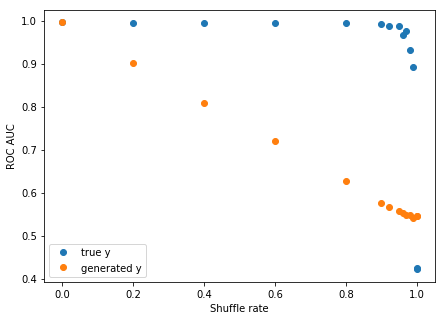

In [73]:
plt.figure(figsize=(7, 5))
plt.plot(false_rates, auc_true, 'o', label="true y")
plt.plot(false_rates, auc_new, 'o', label="generated y")
plt.ylabel("ROC AUC")
plt.xlabel("Shuffle rate")
plt.legend(loc=3)
plt.show()

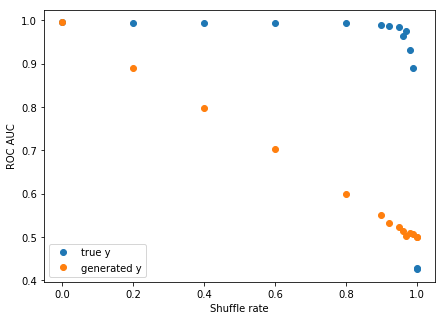

In [74]:
plt.figure(figsize=(7, 5))
plt.plot(false_rates, auc_test_true, 'o', label="true y")
plt.plot(false_rates, auc_test_new, 'o', label="generated y")
plt.ylabel("ROC AUC")
plt.xlabel("Shuffle rate")
plt.legend(loc=3)
plt.show()